In [2]:
from pycaret.regression import *
import pandas as pd

'''
‘lr’ - Linear Regression

‘lasso’ - Lasso Regression

‘ridge’ - Ridge Regression

‘en’ - Elastic Net

‘lar’ - Least Angle Regression

‘llar’ - Lasso Least Angle Regression

‘omp’ - Orthogonal Matching Pursuit

‘br’ - Bayesian Ridge

‘ard’ - Automatic Relevance Determination

‘par’ - Passive Aggressive Regressor

‘ransac’ - Random Sample Consensus

‘tr’ - TheilSen Regressor

‘huber’ - Huber Regressor

‘kr’ - Kernel Ridge

‘svm’ - Support Vector Regression

‘knn’ - K Neighbors Regressor

‘dt’ - Decision Tree Regressor

‘rf’ - Random Forest Regressor

‘et’ - Extra Trees Regressor

‘ada’ - AdaBoost Regressor

‘gbr’ - Gradient Boosting Regressor

‘mlp’ - MLP Regressor

‘xgboost’ - Extreme Gradient Boosting

‘lightgbm’ - Light Gradient Boosting Machine

‘catboost’ - CatBoost Regressor
'''

'\n‘lr’ - Linear Regression\n\n‘lasso’ - Lasso Regression\n\n‘ridge’ - Ridge Regression\n\n‘en’ - Elastic Net\n\n‘lar’ - Least Angle Regression\n\n‘llar’ - Lasso Least Angle Regression\n\n‘omp’ - Orthogonal Matching Pursuit\n\n‘br’ - Bayesian Ridge\n\n‘ard’ - Automatic Relevance Determination\n\n‘par’ - Passive Aggressive Regressor\n\n‘ransac’ - Random Sample Consensus\n\n‘tr’ - TheilSen Regressor\n\n‘huber’ - Huber Regressor\n\n‘kr’ - Kernel Ridge\n\n‘svm’ - Support Vector Regression\n\n‘knn’ - K Neighbors Regressor\n\n‘dt’ - Decision Tree Regressor\n\n‘rf’ - Random Forest Regressor\n\n‘et’ - Extra Trees Regressor\n\n‘ada’ - AdaBoost Regressor\n\n‘gbr’ - Gradient Boosting Regressor\n\n‘mlp’ - MLP Regressor\n\n‘xgboost’ - Extreme Gradient Boosting\n\n‘lightgbm’ - Light Gradient Boosting Machine\n\n‘catboost’ - CatBoost Regressor\n'

In [22]:
model_data=pd.read_csv('transformed_pre_fanasy_data.csv')
model_data.set_index(['manager','season'],inplace=True)
model_data['faab_efficiency_inv'] = model_data['faab_efficiency']*-1
model_features_1=[
                #'avg_rs_win_percent', 
                'rs_points', 
                #'rs_points_against',
                #'playoff_win_percentage',
                'playoff_points',
                #'playoff_points_against',
                'season_rank',
                'draft_efficiency',
                'undrafted_savvy',
                #'faab_efficiency',
                'faab_efficiency_inv'
                ]

model_features_2=[
                'avg_rs_win_percent', 
                'rs_points_against',
                'playoff_win_percentage',
                'playoff_points_against',
                'season_rank',
]
s=setup(model_data[model_features_1],target='season_rank')

,Description,Value
0,Session id,3924
1,Target,season_rank
2,Target type,Regression
3,Original data shape,"(133, 6)"
4,Transformed data shape,"(133, 6)"
5,Transformed train set shape,"(93, 6)"
6,Transformed test set shape,"(40, 6)"
7,Numeric features,5
8,Rows with missing values,54.9%
9,Preprocess,True


In [14]:
best=compare_models(errors='raise')

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,22:44:41
Status,. . . . . . . . . . . . . . . . . .,Loading Estimator
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


In [15]:
print(best)

Ridge(random_state=3778)


In [16]:
ridge=create_model('ridge')
tuned_ridge=tune_model('ridge')

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,22:47:05
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.1007,0.0173,0.1314,0.7592,0.0800,0.2063
1,0.1171,0.0216,0.1470,0.8072,0.1005,0.4592
2,0.1704,0.0344,0.1855,0.2849,0.1290,0.5100
3,0.1127,0.0223,0.1493,0.5759,0.1125,0.5470
4,0.1254,0.0225,0.1500,0.7475,0.0929,0.3525
5,0.1385,0.0295,0.1718,0.6917,0.1245,0.6153
6,0.1677,0.0375,0.1936,0.4471,0.1209,0.3020
7,0.1225,0.0181,0.1344,0.6250,0.0946,0.3842
8,0.1255,0.0196,0.1401,0.7260,0.0835,0.2090


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.1007,0.0173,0.1314,0.7592,0.0800,0.2063
1,0.1171,0.0216,0.1470,0.8072,0.1005,0.4592
2,0.1704,0.0344,0.1855,0.2849,0.1290,0.5100
3,0.1127,0.0223,0.1493,0.5759,0.1125,0.5470
4,0.1254,0.0225,0.1500,0.7475,0.0929,0.3525
5,0.1385,0.0295,0.1718,0.6917,0.1245,0.6153
6,0.1677,0.0375,0.1936,0.4471,0.1209,0.3020
7,0.1225,0.0181,0.1344,0.6250,0.0946,0.3842
8,0.1255,0.0196,0.1401,0.7260,0.0835,0.2090


TypeError: The behavior of tune_model in version 1.0.1 is changed. Please pass trained model object.

In [23]:
br=create_model('br')
tuned_br=tune_model(br,n_iter=100,early_stopping=True)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,22:58:29
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0834,0.0093,0.0965,0.8651,0.0627,0.2325
1,0.1210,0.0183,0.1353,0.7671,0.0853,0.2364
2,0.1103,0.0162,0.1274,0.7826,0.0911,0.4052
3,0.1396,0.0275,0.1659,0.4615,0.1146,0.3977
4,0.1551,0.0404,0.2011,0.6114,0.1370,0.6412
5,0.1989,0.0494,0.2222,0.5012,0.1586,0.6421
6,0.1742,0.0401,0.2003,0.4916,0.1294,0.5355
7,0.1970,0.0686,0.2619,-0.2528,0.1776,0.5929
8,0.1432,0.0301,0.1736,0.6502,0.1157,0.4077


,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,22:58:42
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0828,0.0093,0.0963,0.8656,0.0627,0.2326
1,0.1217,0.0185,0.1360,0.7645,0.0856,0.2376
2,0.1103,0.0163,0.1275,0.7822,0.0913,0.4068
3,0.1391,0.0275,0.1659,0.4610,0.1145,0.3964
4,0.1543,0.0403,0.2008,0.6127,0.1368,0.6405
5,0.1995,0.0493,0.2221,0.5017,0.1582,0.6460
6,0.1731,0.0400,0.1999,0.4936,0.1291,0.5330
7,0.1953,0.0677,0.2601,-0.2363,0.1765,0.5895
8,0.1428,0.0303,0.1740,0.6483,0.1157,0.4038


Fitting 10 folds for each of 100 candidates, totalling 1000 fits


In [24]:
lr=create_model('lr')
tuned_lr=tune_model(lr,n_iter=100,early_stopping=True)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,23:04:25
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0865,0.0097,0.0984,0.8597,0.0633,0.2337
1,0.1180,0.0176,0.1329,0.7753,0.0840,0.2319
2,0.1104,0.0163,0.1278,0.7813,0.0911,0.3994
3,0.1408,0.0273,0.1653,0.4654,0.1149,0.4012
4,0.1580,0.0411,0.2028,0.6048,0.1382,0.6449
5,0.1970,0.0496,0.2227,0.4989,0.1603,0.6286
6,0.1781,0.0408,0.2019,0.4834,0.1307,0.5463
7,0.2023,0.0716,0.2676,-0.3077,0.1812,0.6040
8,0.1441,0.0295,0.1716,0.6579,0.1157,0.4201


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0865,0.0097,0.0984,0.8597,0.0633,0.2337
1,0.1180,0.0176,0.1329,0.7753,0.0840,0.2319
2,0.1104,0.0163,0.1278,0.7813,0.0911,0.3994
3,0.1408,0.0273,0.1653,0.4654,0.1149,0.4012
4,0.1580,0.0411,0.2028,0.6048,0.1382,0.6449
5,0.1970,0.0496,0.2227,0.4989,0.1603,0.6286
6,0.1781,0.0408,0.2019,0.4834,0.1307,0.5463
7,0.2023,0.0716,0.2676,-0.3077,0.1812,0.6040
8,0.1441,0.0295,0.1716,0.6579,0.1157,0.4201


,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,23:04:32
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0865,0.0097,0.0984,0.8597,0.0633,0.2337
1,0.1180,0.0176,0.1329,0.7753,0.0840,0.2319
2,0.1104,0.0163,0.1278,0.7813,0.0911,0.3994
3,0.1408,0.0273,0.1653,0.4654,0.1149,0.4012
4,0.1580,0.0411,0.2028,0.6048,0.1382,0.6449
5,0.1970,0.0496,0.2227,0.4989,0.1603,0.6286
6,0.1781,0.0408,0.2019,0.4834,0.1307,0.5463
7,0.2023,0.0716,0.2676,-0.3077,0.1812,0.6040
8,0.1441,0.0295,0.1716,0.6579,0.1157,0.4201


Fitting 10 folds for each of 2 candidates, totalling 20 fits


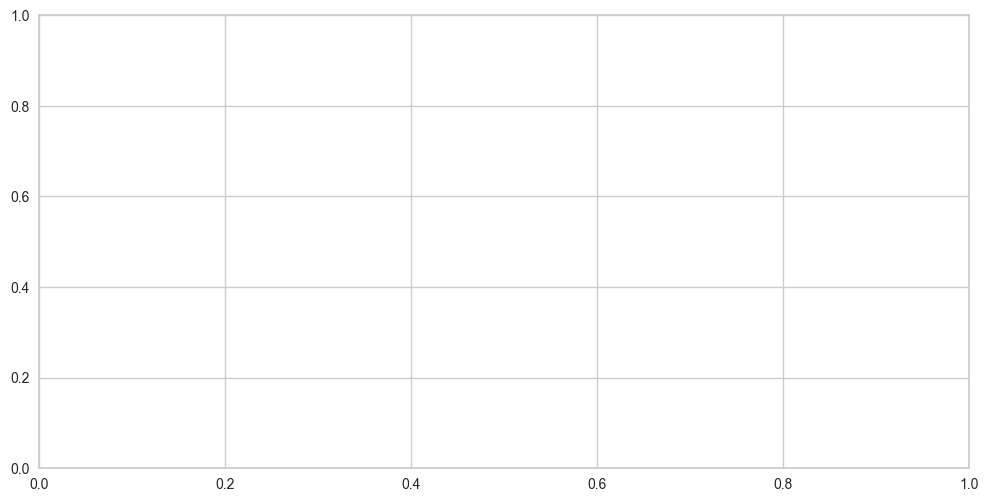

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [25]:
#model_2 features
evaluate_model(br)

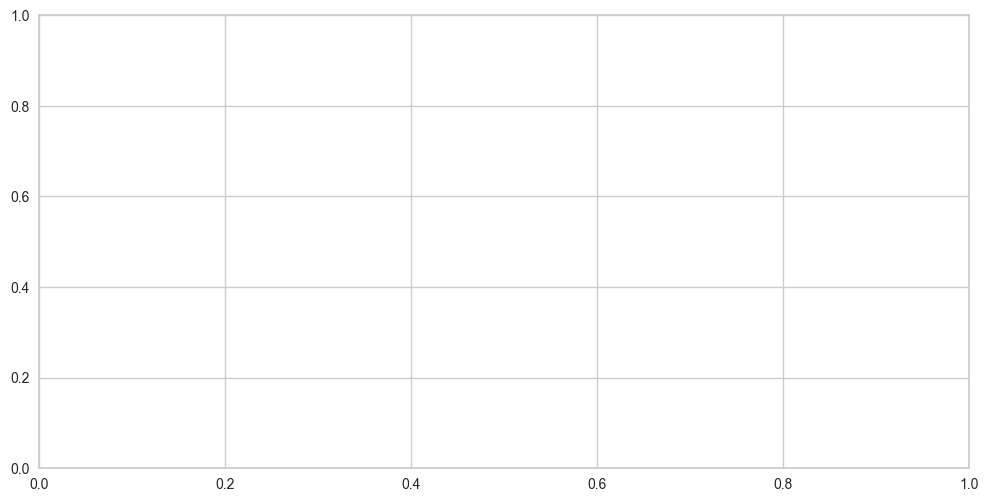

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [26]:
#model_2 features
evaluate_model(lr)

In [79]:
lr.coef_

array([-0.15010934, -0.13308954, -0.02289961,  0.02742853, -0.03829502],
      dtype=float32)

In [62]:
model_1_weights={
    'rs_points':.151,
    'playoff_points':.103,
    'draft_efficiency':.035,
    'faab_efficiency':.023,
    'undrafted_savvy':.014
}
model_2_weights={
    'avg_rs_win_percent':.183,
    'playoff_win_percentage':.132,
    'playoff_points_against':.053,
    'rs_points_against':.016
}
#get proportions
model_1_overall_weight=.8
inverse_model_2_weights=True
season_rank_weight=15
available_weight=100-season_rank_weight

print('Features managers have control over:')
sum_model_1=sum(model_1_weights.values())
for k in model_1_weights:
    proportion = model_1_weights[k] / sum_model_1
    points_weight = proportion*model_1_overall_weight*available_weight
    print(f'{k}: {proportion} - {points_weight}')

print('\nFeatures managers do not have control over:')
sum_model_2=sum(model_1_weights.values())
i=1
for k in model_2_weights:
    if inverse_model_2_weights:
        inverted_key=list(model_2_weights.keys())[-i]
        proportion = proportion = model_2_weights[inverted_key] / sum_model_2
    else:
        proportion = model_2_weights[k] / sum_model_2
    points_weight = proportion*(1-model_1_overall_weight)*available_weight
    print(f'{k}: {proportion} - {points_weight}')
    i=i+1

Features managers have control over:
rs_points: 0.44985673352435535 - 30.590257879656164
playoff_points: 0.27363896848137537 - 18.607449856733528
faab_efficiency: 0.13180515759312322 - 8.96275071633238
draft_efficiency: 0.09598853868194844 - 6.5272206303724944
undrafted_savvy: 0.048710601719197714 - 3.3123209169054446

Features managers do not have control over:
avg_rs_win_percent: 0.07736389684813753 - 1.3151862464183377
playoff_win_percentage: 0.14326647564469916 - 2.4355300859598854
playoff_points_against: 0.39828080229226365 - 6.77077363896848
rs_points_against: 0.6017191977077364 - 10.229226361031516


In [51]:
model_1_weights.values

<function dict.values>

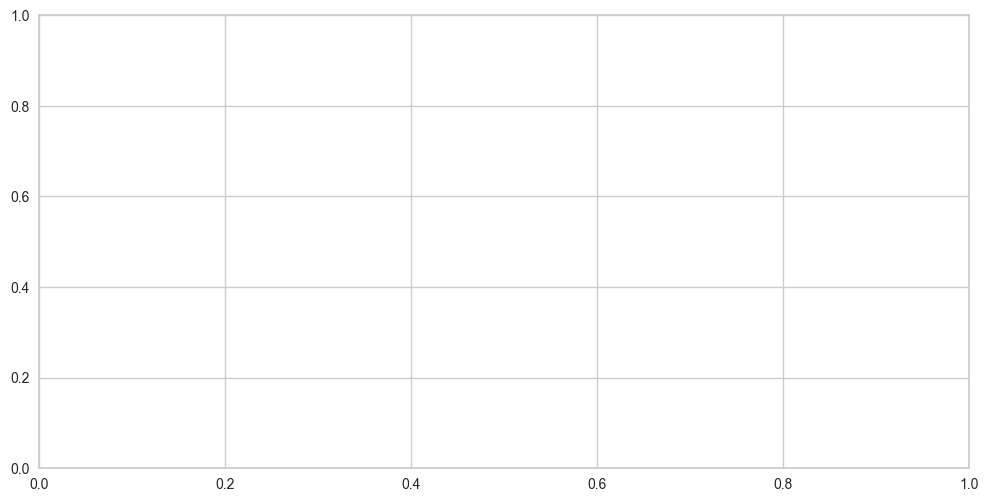

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [39]:
evaluate_model(br)

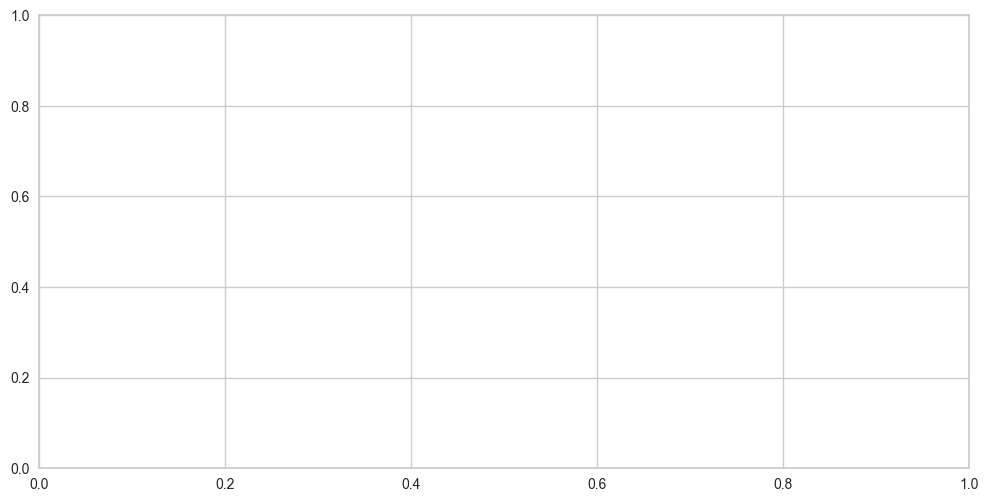

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [40]:
evaluate_model(tuned_lr)

In [31]:
tuned_lr.coef_

array([-0.13894585,  0.07640509, -0.08877205, -0.00340982, -0.04395653,
        0.01757853,  0.01701007], dtype=float32)